인구 데이터 기반 소득 예측 AI 해커톤

심사기준 : Accuracy

1. Load Data

In [2]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('./sample_submission.csv')

In [3]:
# 데이터프레임 정보 출력
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17480 entries, 0 to 17479
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              17480 non-null  int64 
 1   age             17480 non-null  int64 
 2   workclass       15644 non-null  object
 3   fnlwgt          17480 non-null  int64 
 4   education       17480 non-null  object
 5   education.num   17480 non-null  int64 
 6   marital.status  17480 non-null  object
 7   occupation      15637 non-null  object
 8   relationship    17480 non-null  object
 9   race            17480 non-null  object
 10  sex             17480 non-null  object
 11  capital.gain    17480 non-null  int64 
 12  capital.loss    17480 non-null  int64 
 13  hours.per.week  17480 non-null  int64 
 14  native.country  16897 non-null  object
 15  target          17480 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 2.1+ MB


In [4]:
train.shape

(17480, 16)

In [5]:
# 결측값 확인
train.isnull().sum()

id                   0
age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
target               0
dtype: int64

In [6]:
# 데이터프레임의 칼럼 이름 확인
train.columns

Index(['id', 'age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'target'],
      dtype='object')

* id : 샘플 아이디
* age : 나이
* workclass : 고용 형태 (일하는 조직 또는 회사의 종류)
* fnlwgt : CPS(Current Population Survey) 가중치
* education : 교육수준
* education.num : 교육수준 번호
* marital.status : 결혼 상태
* occupation : 직업
* relationship : 가족관계
* race : 인종
* sex : 성별
* capital.gain : 자본 이익
* capital.loss : 자본 손실
* hours.per.week : 주당 근무시간
* native.country : 본 국적
* target : 소득
  * 0 = <=50K (5만 달러 이하)
  * 1 >50K (5만 달러 초과)

In [7]:
# 수치형 데이터의 통계값 확인
train.describe()

,id,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,target
count,17480.000000,17480.000000,1.748000e+04,17480.000000,17480.000000,17480.00000,17480.000000,17480.000000
mean,8739.500000,38.720995,1.897610e+05,10.036556,1076.644508,83.87460,40.002460,0.234897
std,5046.185688,14.079617,1.049929e+05,2.604415,7439.498620,396.03288,12.671265,0.423947
min,0.000000,17.000000,1.228500e+04,1.000000,0.000000,0.00000,1.000000,0.000000
25%,4369.750000,27.000000,1.181558e+05,9.000000,0.000000,0.00000,38.000000,0.000000
50%,8739.500000,37.000000,1.781340e+05,10.000000,0.000000,0.00000,40.000000,0.000000
75%,13109.250000,48.000000,2.373180e+05,12.000000,0.000000,0.00000,45.000000,0.000000
max,17479.000000,90.000000,1.455435e+06,16.000000,99999.000000,4356.00000,99.000000,1.000000


In [8]:
# ID 값 제거
train_drop = train.drop(['id'],axis = 1)

# 범주형 데이터의 통계값 확인
train_drop.describe(include=['object'])

,workclass,education,marital.status,occupation,relationship,race,sex,native.country
count,15644,17480,17480,15637,17480,17480,17480,16897
unique,8,16,7,14,6,5,2,41
top,Private,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
freq,11568,5566,8003,2113,6972,14864,11590,15393


2. EDA

In [9]:
# 시각화에 필요한 라이브러리 Import
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import matplotlib.font_manager as fm

# 불필요한 경고 메시지 무시
import warnings
warnings.filterwarnings("ignore")

# 그래프 스타일 설정
plt.style.use("ggplot")

# 한글 폰트를 사용하기 위한 코드
fe = fm.FontEntry(fname = 'MaruBuri-Regular.otf', name = 'MaruBuri')
fm.fontManager.ttflist.insert(0, fe)
plt.rc('font', family='MaruBuri')

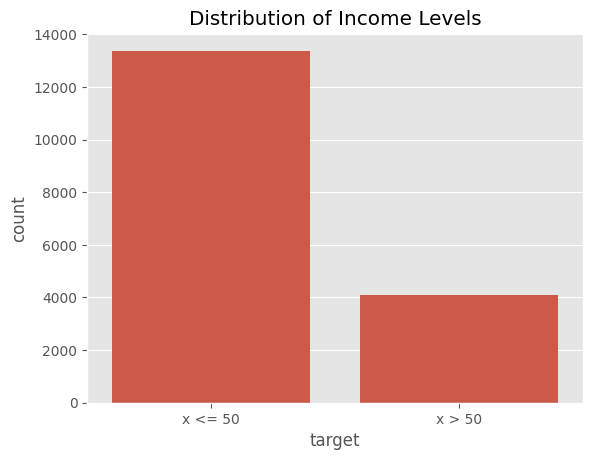

In [10]:
# 소득 수준(target)에 따른 데이터 분포를 막대 그래프로 시각화
axs = sns.countplot(x="target", data=train)

# x축 레이블과 눈금 설정
axs.set_xticklabels(labels = ["x <= 50", "x > 50"])

# 그래프 제목 설정
axs.set_title("Distribution of Income Levels")

# 그래프 표시
plt.show()

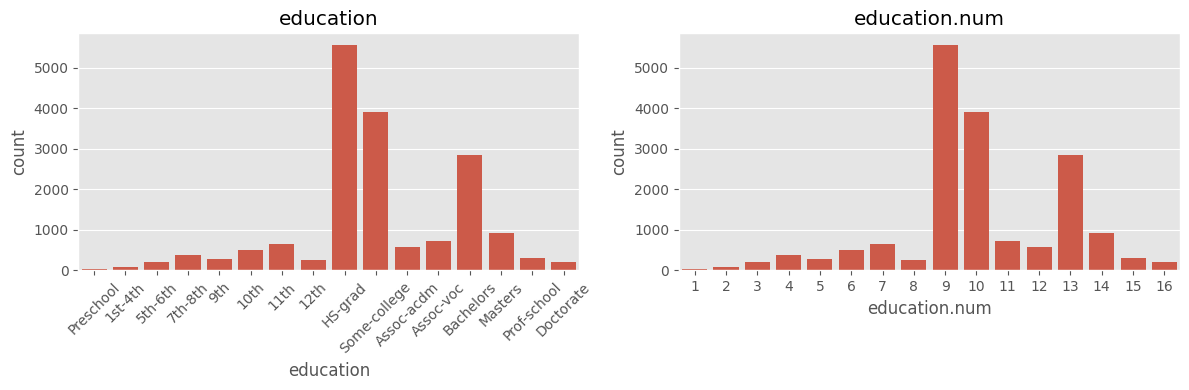

In [11]:
# 교육 수준 분포
# 그림 크기 설정
fig, axs = plt.subplots(figsize=(12, 4), ncols=2)

orders = ['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th',
'HS-grad','Some-college','Assoc-acdm','Assoc-voc','Bachelors','Masters','Prof-school','Doctorate']

# 첫 번째 subplot: education 카테고리 시각화
sns.countplot(x="education", data=train, order=orders, ax=axs[0])
axs[0].set_xticklabels(labels = orders, rotation=45)
axs[0].set_title('education')

# 두 번째 subplot: education.num 카테고리 시각화
sns.countplot(x="education.num", data=train, ax=axs[1], )
axs[1].set_title('education.num')

# subplot 간 간격 조정
plt.tight_layout()

plt.show()

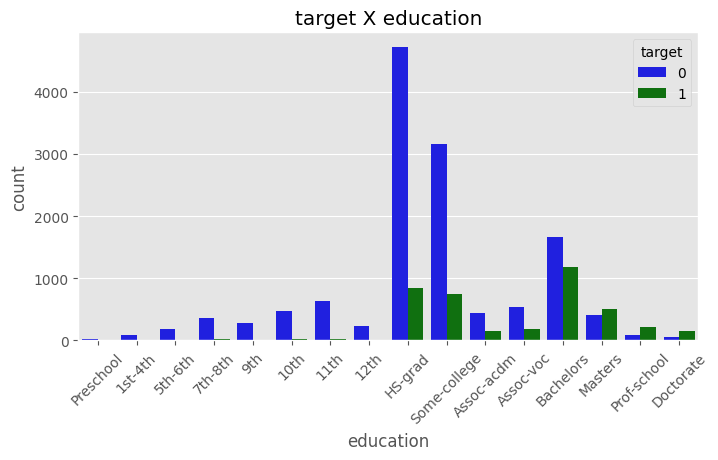

In [12]:
# 교육 수준에 따른 소득 수준 분포
plt.subplots(figsize=(8, 4))

orders = ['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th',
'HS-grad','Some-college','Assoc-acdm','Assoc-voc','Bachelors','Masters','Prof-school','Doctorate']
palette_used = ['blue', 'green']

axs = sns.countplot(x="education", data=train, hue='target', order=orders, palette=palette_used)
axs.set_title('target X education')
axs.set_xticklabels(labels = orders, rotation=45)
plt.show()

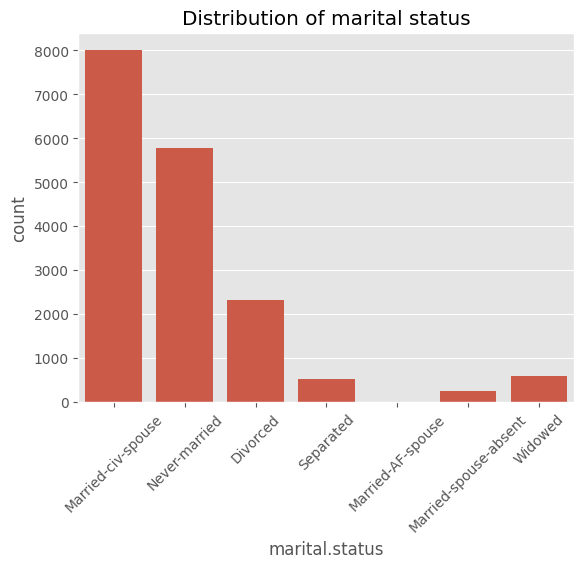

In [13]:
# 결혼상태의 분포
sns.countplot(x="marital.status", data=train)
plt.xticks(rotation=45)
plt.title('Distribution of marital status')
plt.show()

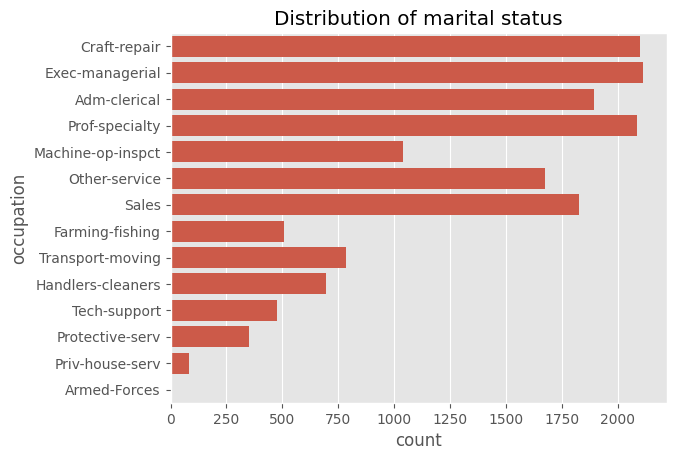

In [14]:
# 직업 분포
sns.countplot(y="occupation", data=train)
plt.title('Distribution of marital status')
plt.show()

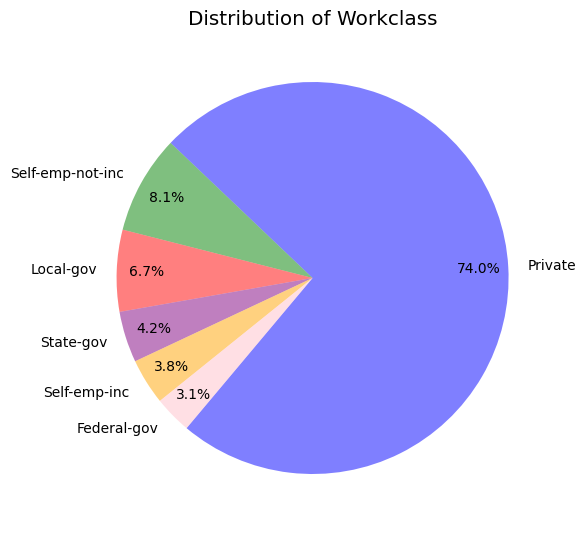

In [15]:
# 직업 유형 분포
# 파이 차트 생성
pie_chart = plt.pie(
    x=train['workclass'].value_counts().values[:-2],
    labels=train['workclass'].value_counts().index[:-2],
    autopct='%1.1f%%',
    colors=['blue', 'green', 'red', 'purple', 'orange', 'pink'],
    startangle=230,
    pctdistance=0.85
)

# 파이 차트의 투명도 조절
for wedge in pie_chart[0]:
    wedge.set_alpha(0.5)

# 파이 차트 크기 조절
plt.gcf().set_size_inches(7,7)

# 텍스트 레이블 자동 배치
plt.subplots_adjust(left=0.0, right=0.7)
plt.title('Distribution of Workclass')
plt.show()


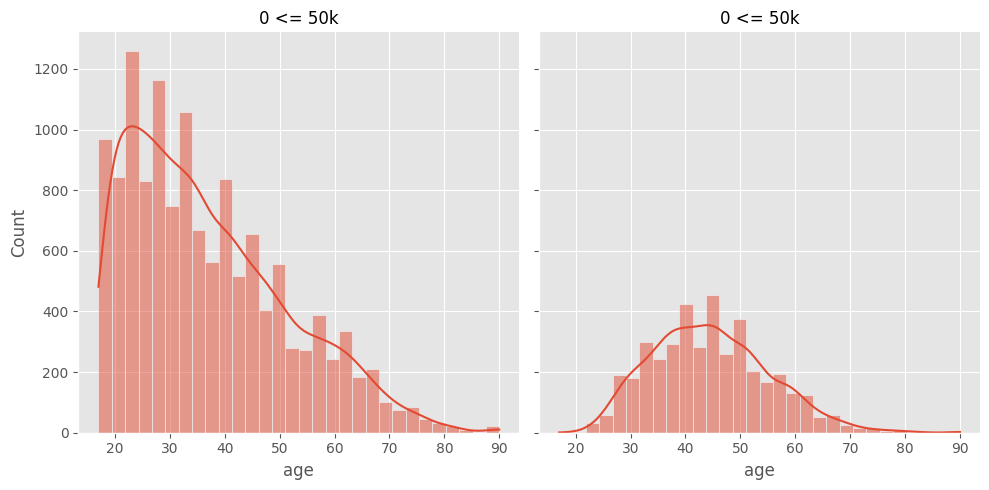

In [16]:
# 나이 분포
g = sns.displot(data=train, x="age", col="target", kde=True, bins=30)
g.set_titles("0 <= 50k", "0 > 50k")
plt.show()

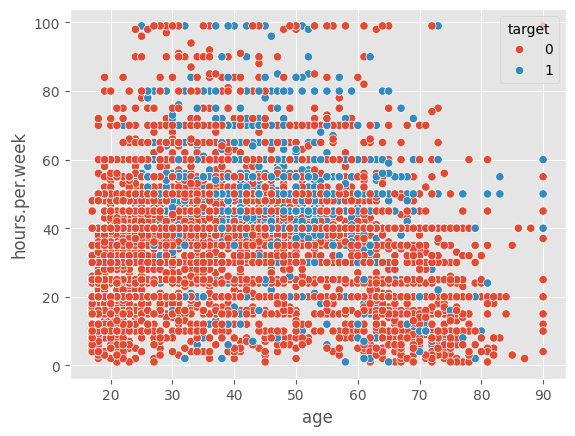

In [17]:
# 주당 근무 시간과 나이의 관계
sns.scatterplot(data=train, x="age", y="hours.per.week", hue="target")
plt.show()

3. Preprocessing

3-1. 결측값 제거

In [18]:
display("-----결측값 제거 전-----", train.isnull().sum())

train_dropna = train.dropna()

display("-----결측값 제거 후-----", train_dropna.isnull().sum())

'-----결측값 제거 전-----'

id                   0
age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
target               0
dtype: int64

'-----결측값 제거 후-----'

id                0
age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
target            0
dtype: int64

In [20]:
# 독립변수
x = train_dropna.drop(['id','target'], axis = 1)

# 종속변수
y = train_dropna['target']

In [21]:
# train과 valid 데이터 7:3으로 분리
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [22]:
print('X_train 데이터 사이즈', x_train.shape)
print('X_valid 데이터 사이즈', x_valid.shape)
print(" ")
print('y_train 데이터 사이즈', y_train.shape)
print('y_valid 데이터 사이즈', y_valid.shape)

X_train 데이터 사이즈 (10556, 14)
X_valid 데이터 사이즈 (4525, 14)
 
y_train 데이터 사이즈 (10556,)
y_valid 데이터 사이즈 (4525,)


In [23]:
# 범주형 데이터 인코딩 : LabelEncoder
from sklearn.preprocessing import LabelEncoder
import numpy as np

# 범주형 열에 대한 LabelEncoder를 적용하여 문자열을 숫자로 변환
for col in x_train.columns:
    if x_train[col].dtype == 'object':

        le = LabelEncoder()
        x_train[col] = le.fit_transform(x_train[col]) # 학습 데이터에 대해 LabelEncoder를 적용하고 변환

        # 검증 데이터에 대한 레이블이 학습 데이터에 없는 경우에 대비하여 클래스 확장
        for label in np.unique(x_valid[col]):
            if label not in le.classes_:
                le.classes_ = np.append(le.classes_, label)
        x_valid[col] = le.transform(x_valid[col]) # 검증 데이터에 대해 LabelEncoder를 적용하고 변환

In [24]:
# RandomForestClassifier 모델을 사용한 valid data 예측 및 평가

from sklearn.ensemble import RandomForestClassifier

# RandomForestClassifier 모델 생성 및 학습
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(x_train, y_train)

# 테스트 데이터로 예측
y_pred = rf_classifier.predict(x_valid)

In [25]:
# Macro F1 Score
from sklearn.metrics import f1_score

# Macro F1 스코어 계산
macro_f1 = f1_score(y_valid, y_pred, average='macro')
print("Macro F1 스코어:", macro_f1)

Macro F1 스코어: 0.7915024567760354


3-2. 결측값 보간(Imputer)을 통한 전처리

In [27]:
# 독립변수
x = train_dropna.drop(['id','target'], axis = 1)

# 종속변수
y = train_dropna['target']

In [32]:
# train과 valid 데이터 7:3으로 분리
from sklearn.model_selection import train_test_split

x_train2, x_valid2, y_train2, y_valid2 = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [33]:
from sklearn.impute import SimpleImputer

# SimpleImputer를 사용하여 결측치를 최빈값으로 보간
imputer = SimpleImputer(strategy='most_frequent')

x_train2[['occupation','workclass']] = imputer.fit_transform(x_train2[['occupation','workclass']])
x_valid2[['occupation','workclass']] = imputer.transform(x_valid2[['occupation','workclass']])

3-3. 불필요한 열 제거를 통한 데이터 전처리

In [36]:
# native country: 결측치가 있는 행의 개수가 적어서 제거 -> 모델의 복잡도 줄일 수 있음
# education: education.num이라는 컬럼이 있고 동일한 정보를 담고 있음
x_train2 = x_train2.drop(['native.country','education'], axis = 1)
x_valid2 = x_valid2.drop(['native.country','education'], axis = 1)

3-4. LabelEncoder를 사용한 범주형 데이터 인코딩

In [37]:
# 범주형 데이터 인코딩 : LabelEncoder
from sklearn.preprocessing import LabelEncoder
import numpy as np

# 범주형 열에 대한 LabelEncoder를 적용하여 문자열을 숫자로 변환
for col in x_train2.columns:
    if x_train2[col].dtype == 'object':

        le = LabelEncoder()
        x_train2[col] = le.fit_transform(x_train2[col]) # 학습 데이터에 대해 LabelEncoder를 적용하고 변환

        # 검증 데이터에 대한 레이블이 학습 데이터에 없는 경우에 대비하여 클래스 확장
        for label in np.unique(x_valid2[col]):
            if label not in le.classes_:
                le.classes_ = np.append(le.classes_, label)
        x_valid2[col] = le.transform(x_valid2[col]) # 검증 데이터에 대해 LabelEncoder를 적용하고 변환

In [39]:
# RandomForestClassifier 모델을 사용한 valid data 예측 및 평가

# RandomForestClassifier 모델 학습
rf_classifier.fit(x_train2, y_train2)

# 테스트 데이터로 예측
y_pred2 = rf_classifier.predict(x_valid2)

In [40]:
macro_f1 = f1_score(y_valid2, y_pred2, average='macro')
print("Macro F1 스코어:", macro_f1)

Macro F1 스코어: 0.7872146277207669


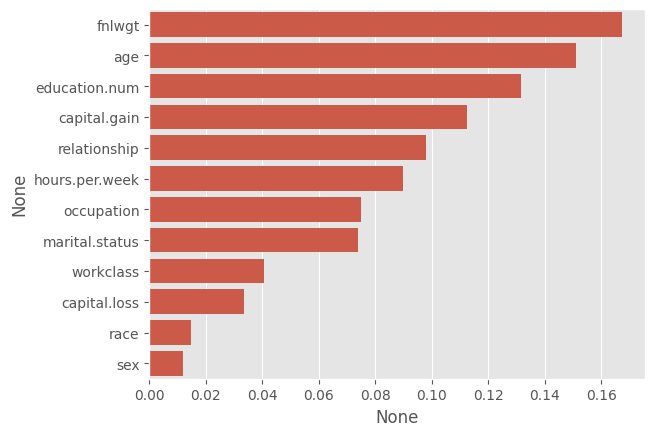

In [42]:
import seaborn as sns

# 각 특성(Feature)의 중요도를 시각화할 시리즈(Series) 생성
feature_series = pd.Series(data=rf_classifier.feature_importances_, index=x_train2.columns)

# 중요도 값 기준으로 내림차순 정렬
feature_series = feature_series.sort_values(ascending=False)

# 중요도를 막대 그래프로 표현하기 위해 seaborn의 barplot 함수 사용
# x에는 중요도 값(feature_series)을, y에는 특성의 이름(열의 이름)을 설정
sns.barplot(x=feature_series, y=feature_series.index)

# 그래프 출력
plt.show()